In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import numpy as np
from numpy import argmax
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ten

In [2]:
#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
classes= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

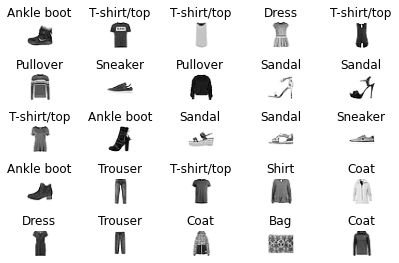

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.Greys)
    plt.tight_layout()
    plt.title(classes[y_train[i]])
    plt.axis('off')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [7]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
# Normalize trainand test input
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [9]:
x_train_sc[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
#One hot encode the ylabels
y_train_ohe =to_categorical(y_train, num_classes=10, dtype='float32')

# invert encoding
#inverted = argmax(y_train_ohe[1])
#print(inverted)

In [11]:
y_train_ohe.shape

(60000, 10)

In [20]:
#Instantiate the model
K.clear_session() # ONLY for jupyter to wipe out all compilations

model = Sequential([
    Dense(20, input_shape = (784,), activation= 'relu'), # input shape of the SINGLE datapoint after flattening
    #Dense(10, activation = 'relu'),
    Dense(10, activation = 'softmax')
]
)

In [21]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
nn_fit = model.fit(x_train_sc, y_train_ohe, batch_size=1000, epochs =50, validation_split = 0.3) #batch size for taking how many datapoint

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 13us/sample - loss: 1.6354 - acc: 0.4356 - val_loss: 1.0951 - val_acc: 0.6753
Epoch 2/50
42000/42000 [==============================] - 0s 11us/sample - loss: 0.8702 - acc: 0.7219 - val_loss: 0.7208 - val_acc: 0.7602
Epoch 3/50
42000/42000 [==============================] - 1s 12us/sample - loss: 0.6644 - acc: 0.7820 - val_loss: 0.6157 - val_acc: 0.7968
Epoch 4/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.5885 - acc: 0.8081 - val_loss: 0.5659 - val_acc: 0.8107
Epoch 5/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.5450 - acc: 0.8206 - val_loss: 0.5344 - val_acc: 0.8221
Epoch 6/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.5176 - acc: 0.8295 - val_loss: 0.5128 - val_acc: 0.8252
Epoch 7/50
42000/42000 [==============================] - 0s 10us/sample - loss: 0.4959 - acc: 0.8359 - val_loss: 0.498

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


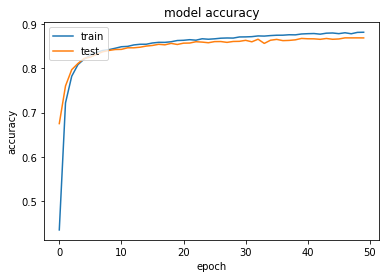

In [23]:
print(nn_fit.history.keys())
# summarize history for accuracy
plt.plot(nn_fit.history['acc'])
plt.plot(nn_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


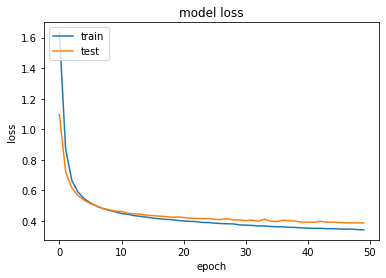

In [24]:
# summarize history for loss
plt.plot(nn_fit.history['loss'])
plt.plot(nn_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
a = model.predict(x_train_sc, batch_size=100)

In [29]:
a.shape

(60000, 10)

In [32]:
argmax(a[1])

0

In [54]:
def final_plot(x_train, ytrue, ypred):
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.tight_layout()
        plt.axis('off')
        if str(classes[argmax(ypred[i])]) == str(classes[ytrue[i]]):
            plt.imshow(x_train.reshape(60000,28,28)[i], alpha = 1.0)
        else:
            plt.imshow(x_train.reshape(60000,28,28)[i], alpha = 0.3)

        #plt.title(classes[argmax(ypred[i])])
        #plt.xlabel(classes[ytrue[i]])


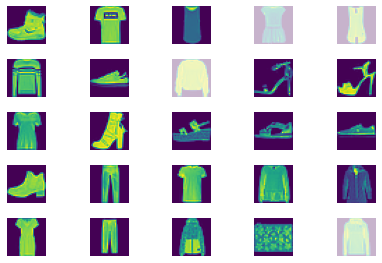

In [55]:
final_plot(x_train, y_train, a)